# Task 2: Develop Time Series Forecasting Models
- Train and Forecast SPY asset


**Model Selection**

Given the options of traditional statistical models (ARIMA, SARIMA) and a deep learning model (LSTM) for time series forecasting,

First, import required libraries and script modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from model_training import ModelTrainer
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

2024-11-17 10:49:25.038964: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 10:49:25.046936: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 10:49:25.070119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731858565.109566   44006 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731858565.119607   44006 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the Data**

In [2]:
# Initialize class instances
path = '../data/'
processor = DataPreprocessor(data_dir = path, logger=logger)

# Load the data
tsla_data = processor.load_data('SPY')


**Prepare the data for Modeling**

In [3]:
# Create trainer instance of ModelTrainer
trainer = ModelTrainer(tsla_data, logger=logger)
# Prepare the data for modeling
trainer.prepare_data()


**Step 1: Train the ARIMA Model**

- optimize the parameters with auto_arima

In [4]:
trainer.train_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18757.396, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18735.536, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18755.725, Time=3.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18755.248, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18735.480, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18751.735, Time=3.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18751.770, Time=4.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-18758.561, Time=10.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18753.312, Time=1.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-18770.458, Time=5.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-18756.482, Time=4.59 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-18753.431, Time=6.68 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-18767.667, Time=20.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-18752.221, Time=6.74 sec
 AR

**Step 2: Train the SARIMA Model**

- optimize the parameters with auto_arima

In [5]:
trainer.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=19.70 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-16548.058, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-17417.980, Time=9.36 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=13.62 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-16572.058, Time=1.73 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-17829.451, Time=3.80 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=13.70 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=15.89 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-17804.431, Time=2.17 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-17827.475, Time=7.06 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-17827.141, Time=14.78 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-17829.011, Time=7.52 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-17825.490, Time=11.22 sec
 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-17827.460, Time=20.07 sec

Best model:  ARIMA(1,1,0)

**Step 3: Train LSTM model**

2024-11-17 10:54:13.447224: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 486ms/step - loss: 0.0789 - val_loss: 0.0023
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 

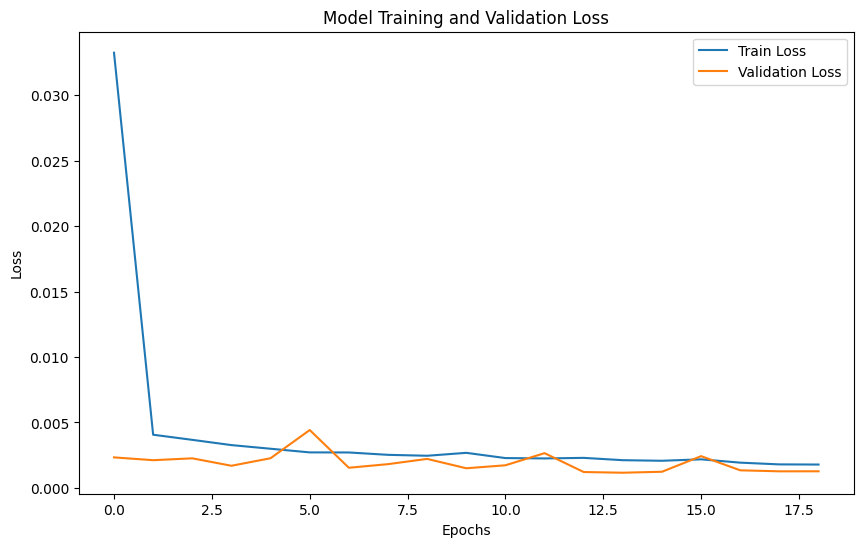

In [6]:
trainer.train_lstm()

**Step 4: Make Predictions**

In [7]:
trainer.make_prediction()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

**Step 5: Evaluate the models**

The models are evaluating using
- MAE, RSME, MAPE

In [8]:
trainer.evaluate_model()


Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.149967  0.198344   13.188687
1  SARIMA  1.412575  1.599380  132.239661
2    LSTM  0.315150  0.381765   28.462518


**Step 6: Compare the models**

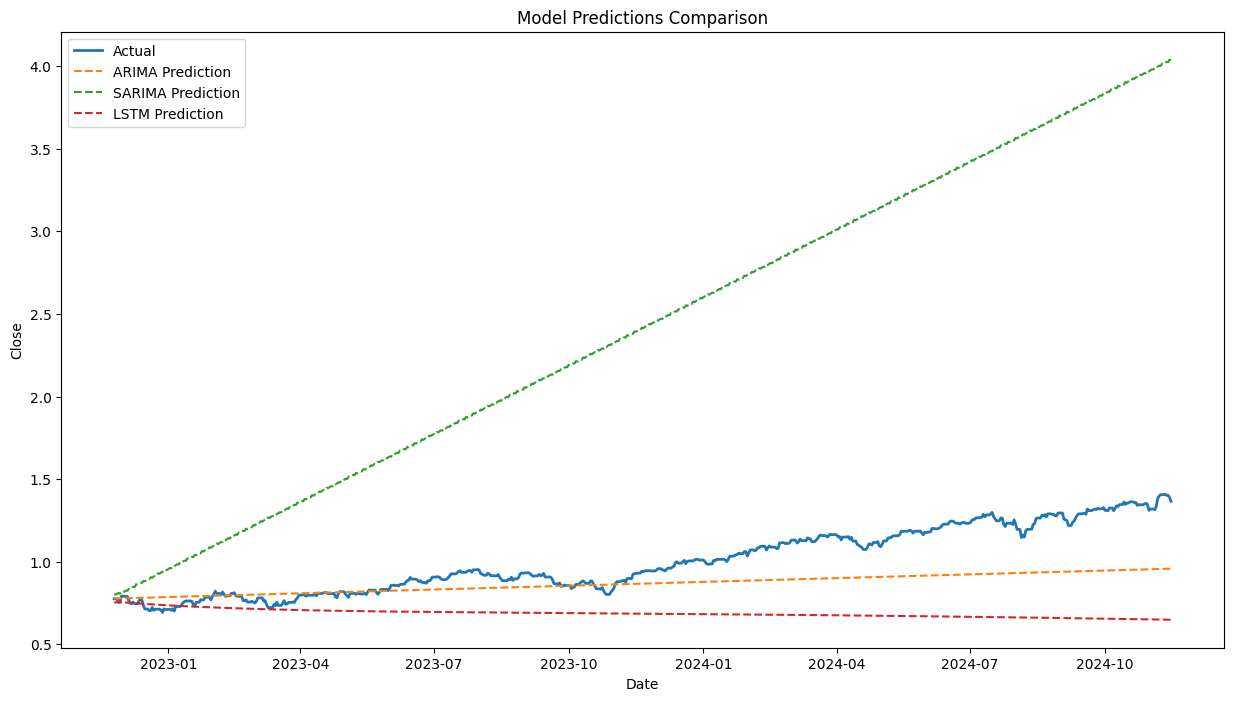

In [9]:
trainer.plot_result()

**Step 7: Forecast the next 6-12 months and save the forecast to csv with confidence interval**

In [10]:
# model_trainer.forecast(months=6, output_file='forecast_6_months.csv')
trainer.forecast(months=12, output_file='../data/spy_forecast_12_months.csv', best_model='LSTM')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━